
## Introduction
In this notebook ,we're going to analyze sales invoices for an online store  with the goal of helping the  business to better understand its customers purchasing patterns.

### 1.Problem Definition¶

The objective of this analysis is to be answer raised business questions with the aim of pointing potential business growth areas.

### Data

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

The following are features of our online retail dataset:
1. InvoiceNo
2. StockCode
3. Description
4. Quantity
5. Invoice Date
6. UnitPrice
7. CustomerID
8. Country

### Data Dictionary
Column Descriptors
* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts    with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.



### Busines Questions 
**1.Based on your understanding of the data, what kind of business is this company in?**

  **2.Analyze the sales performance of this company and provide your insights regarding the same.**
  
  **3.Based on your analysis of the data,what are the potential areas of improvement for the business?**
  
 **4.What are additional business problems that can be analyzed using this data.Support with explanation.**
  
 **The answers are provided below after performing Exploratory Data Analysis**

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#Load our dataset
retail_data=pd.read_excel('D:/DS/dataset/Online Retail.xlsx')
# view data in summary
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Rearrange the columns for easier readability
retail_data=retail_data[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]
retail_data.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


### Data Preprocessing 
 This is done to improve the quality of the data and to make it more suitable for our analysis.

In [5]:
#Check for missing values
print('Missing Values \n :',retail_data.isna().sum())
# % of missing values
round ((retail_data.isna().sum()/len(retail_data))*100,2)

Missing Values 
 : CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64


CustomerID     24.93
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
UnitPrice       0.00
Description     0.27
InvoiceDate     0.00
Country         0.00
dtype: float64

We have missing values in our CustomerID and Description columns comprising of about 24.93% and 0.27% of our total dataset respectively.

#### 1.Based on your understanding of the data, what kind of business is this company in?
**Answer** : As the name suggests the business operates in online retail across countries such as :**'United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'**

In [6]:
#Viewing the list of unique  online store the business operates in 
retail_data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

#### 2.Analyze the sales performance of this company and provide your insights regarding the same.

In [7]:
#Create a new column to handle an item's total amount
TotalAmount=retail_data['Quantity']*retail_data['UnitPrice']
#insert into our dataframe
retail_data.insert(loc=5,column='TotalAmount',value=TotalAmount)
#view the dataset with new column added
retail_data.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


### 3.Exploratory Data Analysis

#### Grouping countries by Quantity of orders placed and getting the top and bottom 10 countries

In [8]:
country_orders=retail_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print('Top 10 countries by quantity of orders placed:\n ',country_orders[:10])
print('\n Bottom 10 countries by quantity of orders placed:\n ',country_orders[-10:])

Top 10 countries by quantity of orders placed:
  Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

 Bottom 10 countries by quantity of orders placed:
  Country
United Arab Emirates    982
Malta                   944
Lithuania               652
Czech Republic          592
European Community      497
Lebanon                 386
Brazil                  356
RSA                     352
Bahrain                 260
Saudi Arabia             75
Name: Quantity, dtype: int64


<AxesSubplot: title={'center': 'Top 10 Countries by Orders'}, xlabel='Country'>

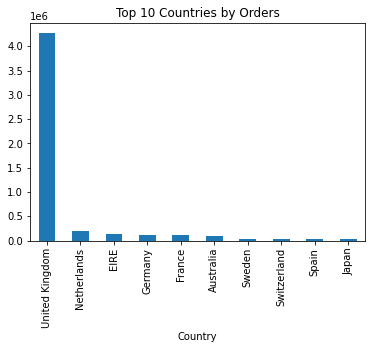

In [9]:
country_orders[:10].plot(kind='bar',title="Top 10 Countries by Orders")


#### Grouping countries by Total Amount of sales made and getting the top and bottom 10 countries by Total Sales

In [10]:
country_sales=retail_data.groupby('Country')['TotalAmount' ].sum().sort_values(ascending=False)
print('Top 10 Countries by Total Amount of Sales: \n',country_sales[:10])
print('\nBottom 10 Countries by Total Amount of Sales: \n',country_sales[-10:])


Top 10 Countries by Total Amount of Sales: 
 Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Australia         1.370773e+05
Switzerland       5.638535e+04
Spain             5.477458e+04
Belgium           4.091096e+04
Sweden            3.659591e+04
Name: TotalAmount, dtype: float64

Bottom 10 Countries by Total Amount of Sales: 
 Country
United Arab Emirates    1902.28
USA                     1730.92
Lebanon                 1693.88
Lithuania               1661.06
European Community      1291.75
Brazil                  1143.60
RSA                     1002.31
Czech Republic           707.72
Bahrain                  548.40
Saudi Arabia             131.17
Name: TotalAmount, dtype: float64


#### Top 10 Countries with least  orders placed


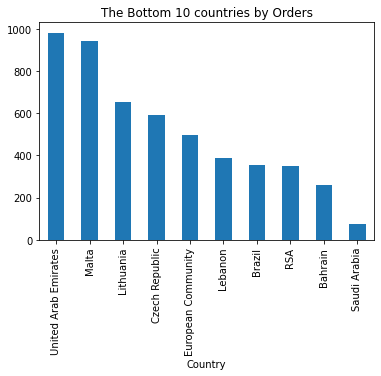

In [11]:
country_orders[-10:].plot(kind="bar",title="The Bottom 10 countries by Orders");

In [12]:
#Obtain the time ,month and year from our invoice date column
retail_data['Time']=retail_data['InvoiceDate'].dt.time
retail_data['MonthNo.']=retail_data['InvoiceDate'].dt.month
retail_data['MonthName']=retail_data['InvoiceDate'].dt.month_name()
retail_data['Year']=retail_data['InvoiceDate'].dt.year
#View dataset with new columns
retail_data.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country,Time,MonthNo.,MonthName,Year
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010


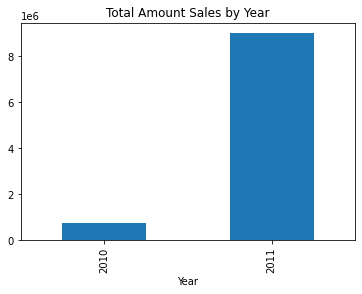

In [13]:
#View Total Amount of sales across the years
retail_data.groupby('Year')['TotalAmount'].sum().plot(kind="bar",title="Total Amount Sales by Year");

<AxesSubplot: title={'center': 'TotalAmount Sales by Month'}, xlabel='MonthNo.,Year'>

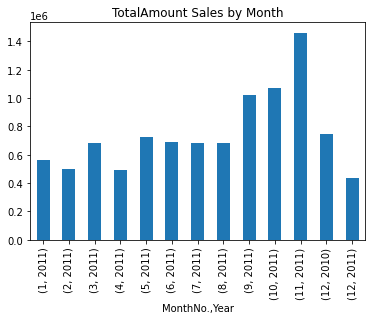

In [14]:
#Performing sales by month
retail_data.groupby(['MonthNo.','Year'])['TotalAmount'].sum().plot(kind="bar",title="TotalAmount Sales by Month")

In [15]:
#Checking why dec 2011 has a drop comparing to nov 2011
orders_2011=retail_data[(retail_data['Year']==2011)]
orders_dec2011=orders_2011[(retail_data['MonthName']=="December")]
orders_dec2011=orders_dec2011['InvoiceDate'].dt.date.unique()
orders_dec2011

<ipython-input-15-9b407f617152>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orders_dec2011=orders_2011[(retail_data['MonthName']=="December")]


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

#### Performance Analysis
Sales Performance can be seen with
1.  Number of sales every month
2. Number of sales every year
3. We see that in 2010 we have sales only for December and in 2011 we have sales for the whole year.
4. We can see that from September to November we have very good sales
5. We could see that December 2010 we have sales of 748957 and in December 2011 we have sales of 433668 which is a huge drop when analyzed futher we find that we have only data upto 9th December 2011,so we find a sales drop in the month of December 2011.

#### 3. Based on your analysis of the data,what are the potential areas of improvement for the business?

In [16]:
#Removing missing values
retail_data=retail_data.dropna()
#We do not have missing values
retail_data.isna().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
UnitPrice      0
TotalAmount    0
Description    0
InvoiceDate    0
Country        0
Time           0
MonthNo.       0
MonthName      0
Year           0
dtype: int64

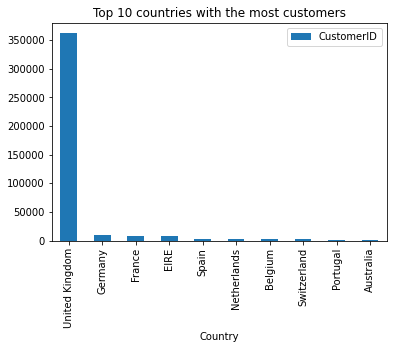

In [17]:
#Looking at countries with the most customers by orders placed
customer_id=retail_data.groupby('Country')['CustomerID'].count().sort_values(ascending=False)
customer_id[:10].plot(kind="bar",title="Top 10 countries with the most customers",legend='CustomerID');

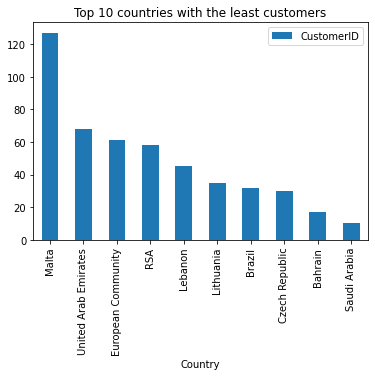

In [18]:
#Looking at countries with the least number of customers by orders placed.
customer_id[-10:].plot(kind="bar",title="Top 10 countries with the least customers",legend="CustomerID");

#### 4.What are additional business problems that can be analyzed using this data.Support with explanation.

In [19]:
retail_data.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country,Time,MonthNo.,MonthName,Year
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,08:26:00,12,December,2010


#### Word Map

In [24]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

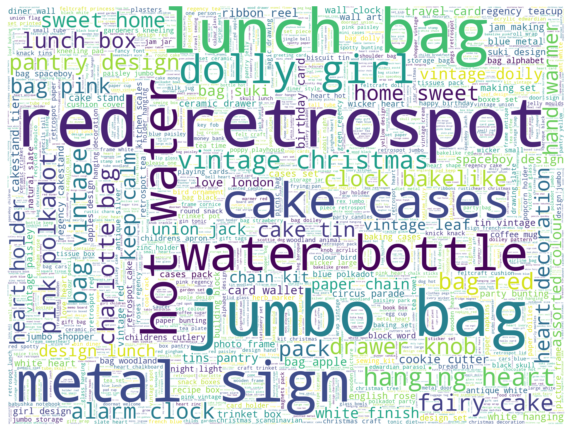

In [29]:
words = " ".join(retail_data['Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =2000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
#Sales Average by Product item
avg_sales=retail_data.groupby(['Description','Country'])['Quantity','TotalAmount'].mean().sort_values(by='TotalAmount',ascending=False)
print('Top 10 Products by Total Sales Amount: \n',avg_sales[:10])
print('\n Least 10 Products by Total Sales Amount: \n',avg_sales[-10:])


<ipython-input-30-816da593a88e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales=retail_data.groupby(['Description','Country'])['Quantity','TotalAmount'].mean().sort_values(by='TotalAmount',ascending=False)


Top 10 Products by Total Sales Amount: 
                                                      Quantity   TotalAmount
Description                       Country                                  
PICNIC BASKET WICKER 60 PIECES    United Kingdom    30.500000  19809.750000
TEA TIME TEA TOWELS               United Kingdom  1300.000000   3022.500000
RABBIT NIGHT LIGHT                Netherlands      685.857143   1366.925714
FELTCRAFT CHRISTMAS FAIRY         Australia        336.000000   1260.000000
PINK 3 PIECE POLKADOT CUTLERY SET Spain            360.000000   1220.400000
BLUE 3 PIECE POLKADOT CUTLERY SET Spain            360.000000   1220.400000
RABBIT NIGHT LIGHT                Japan            680.200000   1217.558000
VINTAGE CHRISTMAS TABLECLOTH      Australia        100.000000   1039.000000
MISELTOE HEART WREATH CREAM       EIRE             240.000000    996.000000
BICYCLE SAFTEY WALL ART           Australia        180.000000    963.000000

 Least 10 Products by Total Sales Amount: 
   

## Summary
1. Based on the dataset the month of November 2011 had the highest sales based on fulfilled invoices
coming from Rabbit Night Light,Paper Chains kit 50's Christmas and hot water keep calm.
2. A majority of the orders get to be placed in the afternoon followed by those in the morning and few in
the evening with best performing sales days are from Monday-Thursday.
3. In December 2010 we had more sales than in 2011 which is a huge drop when analyzed further we find
that we have only data up to 9th December 2011,so we find a sales drop in the month of December 2011.
##  Recommendation
1. Obtain more data to have a good analytical view and compare in between months or years.
2. We find very less number of customers in Lithuania,Brazil,Czech Republic,Barhran,Saudi Arabia. We could
improve the business by doing market research on the prefered products and conduct marketing and
promotions.
3.We see that September to December we have very high sales we can also work on product offerings
improving the sales for the other 8 months.